## 1. The oldest businesses in the world
<p>This is Staffelter Hof Winery, Germany's oldest business, which was established in 862 under the Carolingian dynasty. It has continued to serve customers through dramatic changes in Europe such as the Holy Roman Empire, the Ottoman Empire, and both world wars. What characteristics enable a business to stand the test of time? Image credit: <a href="https://commons.wikimedia.org/wiki/File:MKn_Staffelter_Hof.jpg">Martin Kraft</a>
<img src="https://assets.datacamp.com/production/project_1383/./img/MKn_Staffelter_Hof.jpeg" alt="The entrance to Staffelter Hof Winery, a German winery established in 862." width="400"></p>
<p>To help answer this question, BusinessFinancing.co.uk <a href="https://businessfinancing.co.uk/the-oldest-company-in-almost-every-country">researched</a> the oldest company that is still in business in almost every country and compiled the results into a dataset. Let's explore this work to to better understand these historic businesses. Our datasets, which are all located in the <code>datasets</code> directory, contain the following information: </p>
<h3 id="businessesandnew_businesses"><code>businesses</code> and <code>new_businesses</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>business</code></td>
<td>varchar</td>
<td>Name of the business.</td>
</tr>
<tr>
<td style="text-align:left;"><code>year_founded</code></td>
<td>int</td>
<td>Year the business was founded.</td>
</tr>
<tr>
<td style="text-align:left;"><code>category_code</code></td>
<td>varchar</td>
<td>Code for the category of the business.</td>
</tr>
<tr>
<td style="text-align:left;"><code>country_code</code></td>
<td>char</td>
<td>ISO 3166-1 3-letter country code.</td>
</tr>
</tbody>
</table>
<h3 id="countries"><code>countries</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>country_code</code></td>
<td>varchar</td>
<td>ISO 3166-1 3-letter country code.</td>
</tr>
<tr>
<td style="text-align:left;"><code>country</code></td>
<td>varchar</td>
<td>Name of the country.</td>
</tr>
<tr>
<td style="text-align:left;"><code>continent</code></td>
<td>varchar</td>
<td>Name of the continent that the country exists in.</td>
</tr>
</tbody>
</table>
<h3 id="categories"><code>categories</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>category_code</code></td>
<td>varchar</td>
<td>Code for the category of the business.</td>
</tr>
<tr>
<td style="text-align:left;"><code>category</code></td>
<td>varchar</td>
<td>Description of the business category.</td>
</tr>
</tbody>
</table>
<p>Now let's learn about some of the world's oldest businesses still in operation!</p>

In [1]:
# Import the pandas library under its usual alias 
import pandas as pd

# Load the business.csv file as a DataFrame called businesses
businesses = pd.read_csv('datasets/businesses.csv')

# Sort businesses from oldest businesses to youngest
sorted_businesses = businesses.sort_values(by='year_founded')

# Display the first few lines of sorted_businesses
sorted_businesses.head()

,business,year_founded,category_code,country_code
64,Kongō Gumi,578,CAT6,JPN
94,St. Peter Stifts Kulinarium,803,CAT4,AUT
107,Staffelter Hof Winery,862,CAT9,DEU
106,Monnaie de Paris,864,CAT12,FRA
103,The Royal Mint,886,CAT12,GBR


## 2. The oldest businesses in North America
<p>So far we've learned that Kongō Gumi is the world's oldest continuously operating business, beating out the second oldest business by well over 100 years! It's a little hard to read the country codes, though. Wouldn't it be nice if we had a list of country names to go along with the country codes?</p>
<p>Enter <code>countries.csv</code>, which is also located in the <code>datasets</code> folder. Having useful information in different files is a common problem: for data storage, it's better to keep different types of data separate, but for analysis, we want all the data in one place. To solve this, we'll have to join the two tables together. </p>
<h3 id="countries"><code>countries</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>country_code</code></td>
<td>varchar</td>
<td>ISO 3166-1 3-letter country code.</td>
</tr>
<tr>
<td style="text-align:left;"><code>country</code></td>
<td>varchar</td>
<td>Name of the country.</td>
</tr>
<tr>
<td style="text-align:left;"><code>continent</code></td>
<td>varchar</td>
<td>Name of the continent that the country exists in.</td>
</tr>
</tbody>
</table>
<p>Since <code>countries.csv</code> contains a <code>continent</code> column, merging the datasets will also allow us to look at the oldest business on each continent! </p>

In [2]:
# Load countries.csv to a DataFrame
countries = pd.read_csv("datasets/countries.csv")

# Merge sorted_businesses with countries
businesses_countries = sorted_businesses.merge(countries,on='country_code',how='left')

# Filter businesses_countries to include countries in North America only
north_america = businesses_countries[businesses_countries['continent']=='North America']
north_america.head()

,business,year_founded,category_code,country_code,country,continent
22,La Casa de Moneda de México,1534,CAT12,MEX,Mexico,North America
28,Shirley Plantation,1638,CAT1,USA,United States,North America
33,Hudson's Bay Company,1670,CAT17,CAN,Canada,North America
35,Mount Gay Rum,1703,CAT9,BRB,Barbados,North America
40,Rose Hall,1770,CAT19,JAM,Jamaica,North America


## 3. The oldest business on each continent
<p>Now we can see that the oldest company in North America is La Casa de Moneda de México, founded in 1534. Why stop there, though, when we could easily find out the oldest business on every continent? </p>

In [3]:
# Create continent, which lists only the continent and oldest year_founded
continent = businesses_countries.groupby('continent').agg({"year_founded":"min"})
# Merge continent with businesses_countries
merged_continent = continent.merge(businesses_countries,on=["continent","year_founded"])

# Subset continent so that only the four columns of interest are included
subset_merged_continent = merged_continent[['continent', 'country', 'business', 'year_founded']]
subset_merged_continent

,continent,country,business,year_founded
0,Africa,Mauritius,Mauritius Post,1772
1,Asia,Japan,Kongō Gumi,578
2,Europe,Austria,St. Peter Stifts Kulinarium,803
3,North America,Mexico,La Casa de Moneda de México,1534
4,Oceania,Australia,Australia Post,1809
5,South America,Peru,Casa Nacional de Moneda,1565


## 4. Unknown oldest businesses
<p>BusinessFinancing.co.uk wasn't able to determine the oldest business for some countries, and those countries are simply left off of <code>businesses.csv</code> and, by extension, <code>businesses</code>. However, the <code>countries</code> that we created <em>does</em> include all countries in the world, regardless of whether the oldest business is known. </p>
<p>We can compare the two datasets in one DataFrame to find out which countries don't have a known oldest business! </p>

In [4]:
# Use .merge() to create a DataFrame, all_countries
all_countries = businesses.merge(countries, how='right', indicator = True)

# Filter to include only countries without oldest businesses
missing_countries = all_countries[all_countries["_merge"] != "both"]

# Create a series of the country names with missing oldest business data

missing_countries_series = missing_countries['country']
# Display the series
missing_countries_series

1                                Angola
7                   Antigua and Barbuda
18                              Bahamas
48                   Dominican Republic
50                              Ecuador
57                                 Fiji
59      Micronesia, Federated States of
63                                Ghana
65                               Gambia
69                              Grenada
79            Iran, Islamic Republic of
89                           Kyrgyzstan
91                             Kiribati
92                Saint Kitts and Nevis
107                              Monaco
108                Moldova, Republic of
110                            Maldives
112                    Marshall Islands
131                               Nauru
138                               Palau
139                    Papua New Guinea
143                            Paraguay
144                 Palestine, State of
153                     Solomon Islands
160                            Suriname


## 5. Adding new oldest business data
<p>It looks like we've got some holes in our dataset! Fortunately, we've taken it upon ourselves to improve upon BusinessFinancing.co.uk's work and find oldest businesses in a few of the missing countries. We've stored the newfound oldest businesses in <code>new_businesses</code>, located at <code>"datasets/new_businesses.csv"</code>. It has the exact same structure as our <code>businesses</code> dataset. </p>
<h3 id="new_businesses"><code>new_businesses</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>business</code></td>
<td>varchar</td>
<td>Name of the business.</td>
</tr>
<tr>
<td style="text-align:left;"><code>year_founded</code></td>
<td>int</td>
<td>Year the business was founded.</td>
</tr>
<tr>
<td style="text-align:left;"><code>category_code</code></td>
<td>varchar</td>
<td>Code for the category of the business.</td>
</tr>
<tr>
<td style="text-align:left;"><code>country_code</code></td>
<td>char</td>
<td>ISO 3166-1 3-letter country code.</td>
</tr>
</tbody>
</table>
<p>All we have to do is combine the two so that we've got one more complete list of businesses!</p>

In [5]:
# Import new_businesses.csv
new_businesses = pd.read_csv("datasets/new_businesses.csv")

# Add the data in new_businesses to the existing businesses
all_businesses = pd.concat([new_businesses,businesses])

# Merge and filter to find countries with missing business data
new_all_countries = all_businesses.merge(countries, on="country_code", how="outer", indicator=True)
new_missing_countries = new_all_countries[new_all_countries["_merge"] != "both"]

# Group by continent and create a "count_missing" column
count_missing = new_missing_countries.groupby("continent").agg({"country":"count"})
count_missing.columns = ["count_missing"]
count_missing

,count_missing
continent,
Africa,3
Asia,7
Europe,2
North America,5
Oceania,10
South America,3


## 6. The oldest industries
<p>Remember our oldest business in the world, Kongō Gumi? </p>
<table>
<thead>
<tr>
<th style="text-align:right;"></th>
<th style="text-align:left;">business</th>
<th style="text-align:right;">year_founded</th>
<th style="text-align:left;">category_code</th>
<th style="text-align:left;">country_code</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:right;">64</td>
<td style="text-align:left;">Kongō Gumi</td>
<td style="text-align:right;">578</td>
<td style="text-align:left;">CAT6</td>
<td style="text-align:left;">JPN</td>
</tr>
</tbody>
</table>
<p>We know Kongō Gumi was founded in the year 578 in Japan, but it's a little hard to decipher which industry it's in. Information about what the <code>category_code</code> column refers to is in <code>"datasets/categories.csv"</code>: </p>
<h3 id="categories"><code>categories</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>category_code</code></td>
<td>varchar</td>
<td>Code for the category of the business.</td>
</tr>
<tr>
<td style="text-align:left;"><code>category</code></td>
<td>varchar</td>
<td>Description of the business category.</td>
</tr>
</tbody>
</table>
<p>Let's use <code>categories.csv</code> to understand how many oldest businesses are in each category of industry.</p>

In [6]:
# Import categories.csv and merge to businesses
categories = pd.read_csv("datasets/categories.csv")
businesses_categories = businesses.merge(categories,on='category_code')

# Create a DataFrame which lists the number of oldest businesses in each category
count_business_cats = businesses_categories.groupby("category").agg({"year_founded":"count"})

# Create a DataFrame which lists the cumulative years businesses from each category have been operating
years_business_cats = businesses_categories.groupby("category").agg({"year_founded":"sum"})

# Rename columns and display the first five rows of both DataFrames
count_business_cats.columns = ["count"]
years_business_cats.columns = ["total_years_in_business"]
display(count_business_cats.head(), years_business_cats.head())

,count
category,
Agriculture,6
Aviation & Transport,19
Banking & Finance,37
"Cafés, Restaurants & Bars",6
Conglomerate,3


,total_years_in_business
category,
Agriculture,10669
Aviation & Transport,36598
Banking & Finance,70302
"Cafés, Restaurants & Bars",8532
Conglomerate,5671


## 7. Restaurant representation
<p>No matter how we measure it, looks like Banking and Finance is an excellent industry to be in if longevity is our goal! Let's zoom in on another industry: cafés, restaurants, and bars. Which restaurants in our dataset have been around since before the year 1800?</p>

In [9]:
# Filter using .query() for CAT4 businesses founded before 1800; sort results
old_restaurants = businesses_categories.query("category_code == 'CAT4' and year_founded < 1800")

# Sort the DataFrame
old_restaurants = old_restaurants.sort_values(by="year_founded")
old_restaurants

,business,year_founded,category_code,country_code,category
142,St. Peter Stifts Kulinarium,803,CAT4,AUT,"Cafés, Restaurants & Bars"
143,Sean's Bar,900,CAT4,IRL,"Cafés, Restaurants & Bars"
139,Ma Yu Ching's Bucket Chicken House,1153,CAT4,CHN,"Cafés, Restaurants & Bars"


## 8. Categories and continents
<p>St. Peter Stifts Kulinarium is old enough that the restaurant is believed to have served Mozart - and it would have been over 900 years old even when he was a patron! Let's finish by looking at the oldest business in each category of commerce for each continent. </p>

In [8]:
# Merge all businesses, countries, and categories together
businesses_categories_countries = businesses_categories.merge(countries, on='country_code')

# Sort businesses_categories_countries from oldest to most recent
businesses_categories_countries = businesses_categories_countries.sort_values(by='year_founded')

# Create the oldest by continent and category DataFrame
oldest_by_continent_category = businesses_categories_countries.groupby(["continent","category"]).agg({'year_founded':"min"})
oldest_by_continent_category.head()

year_founded
continent category                                       
Africa    Agriculture                                1947
          Aviation & Transport                       1854
          Banking & Finance                          1892
          Distillers, Vintners, & Breweries          1933
          Energy                                     1968

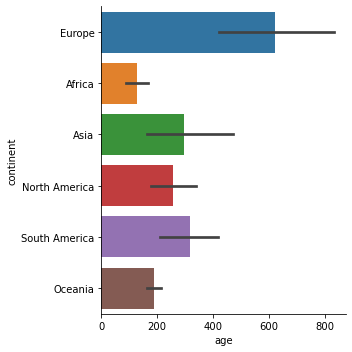

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
w=oldest_by_continent_category.reset_index()
w['age']=pd.Timestamp.now().year-w['year_founded']
w=w.sort_values(by='age')
sns.catplot(data=w, x='age',y='continent', kind='bar');

In [35]:
w

,continent,category,year_founded,age
34,Europe,Media,1999,24
4,Africa,Energy,1968,55
8,Africa,Mining,1962,61
0,Africa,Agriculture,1947,76
7,Africa,Media,1943,80
3,Africa,"Distillers, Vintners, & Breweries",1933,90
21,Asia,Media,1931,92
10,Asia,Agriculture,1930,93
18,Asia,Energy,1928,95
44,North America,Food & Beverages,1920,103


In [13]:
businesses_categories_countries.query("category == 'Media' and continent=='Europe'")

,business,year_founded,category_code,country_code,category,country,continent
118,Meridian Corporation,1999,CAT13,XK,Media,Kosovo,Europe
